# Understanding Pandas Series and DataFrames - Lab

## Introduction

In this lab, let's get some hands on practice working with data cleanup using Pandas.

## Objectives
You will be able to:

* Manipulate columns in DataFrames (df.rename, df.drop)
* Manipulate the index in DataFrames (df.reindex, df.drop, df.rename)
* Manipulate column datatypes

## Let's get started!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('turnstile_180901.txt')
print(len(df))
df.head()

197625


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Rename all the columns to lower case

In [5]:
df.columns = [x.lower() for x in df.columns]
df.head()

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Change the Index to be the Line Names

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197625 entries, 0 to 197624
Data columns (total 11 columns):
c/a                                                                     197625 non-null object
unit                                                                    197625 non-null object
scp                                                                     197625 non-null object
station                                                                 197625 non-null object
linename                                                                197625 non-null object
division                                                                197625 non-null object
date                                                                    197625 non-null object
time                                                                    197625 non-null object
desc                                                                    197625 non-null object
entries                           

In [7]:
df = df.set_index('linename')
df.head()

,c/a,unit,scp,station,division,date,time,desc,entries,exits
linename,,,,,,,,,,
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Painstakingly change the index back

In [8]:
df = df.reset_index()
df.head()

,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits
0,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Create another column 'Num_Lines' that is a count of how many lines pass through a station. Then sort your dataframe by this column in descending order

In [9]:
df['Num_Lines'] = df.linename.map(lambda x: len(x))

In [16]:
df.sort_values(['Num_Lines'], ascending = False)
df.sample(4)

,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits,Num_Lines
94295,BDFMNQRW,N505,R022,02-00-08,34 ST-HERALD SQ,IND,08/28/2018,16:00:00,REGULAR,11577180,9963922,8
157473,456,R250,R179,00-00-0B,86 ST,IRT,08/29/2018,16:00:00,REGULAR,29269378,15394436,3
84204,EF,N335,R158,01-06-03,KEW GARDENS,IND,08/27/2018,10:30:00,REGULAR,325078,2107993,2
58127,2345ACJZ,N095A,R014,01-00-01,FULTON ST,IND,08/28/2018,11:29:11,REGULAR,4403220,796390,8


## Write a function to clean a column name

In [ ]:
def clean(col_name):
    cleaned = #Your code here; whatever you want to do to col_name. Hint: think back to str methods.
    return cleaned

In [ ]:
#This is a list comprehension. It applies your clean function to every item in the list.
#We then reassign that to df.columns
#You shouldn't have to change anything here.
#Your function above should work appropriately here.
df.columns = [clean(col) for col in df.columns] 

In [ ]:
#Checking the output, we can see the results.
df.columns

## Compare subway traffic by day of the week. Display this as a graph.

In [18]:
df.date = pd.to_datetime(df.date)

In [20]:
df['dow'] = df.date.dt.dayofweek

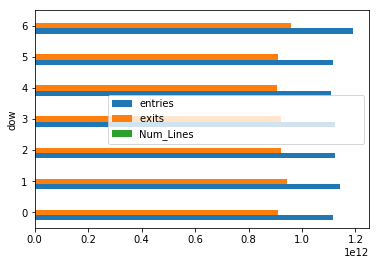

In [21]:
grouped = df.groupby('dow').sum()
grouped.plot(kind='barh')

## Is there more subway traffic on a weekend or a weekday?    Be specific in comparing magnitudes

In [ ]:
#Your code here

## Drop a couple of columns

In [ ]:
# Your code here

## Summary

Great! You practiced your data cleanup-skills using Pandas.